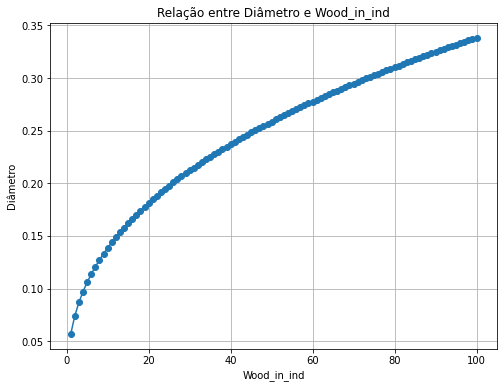

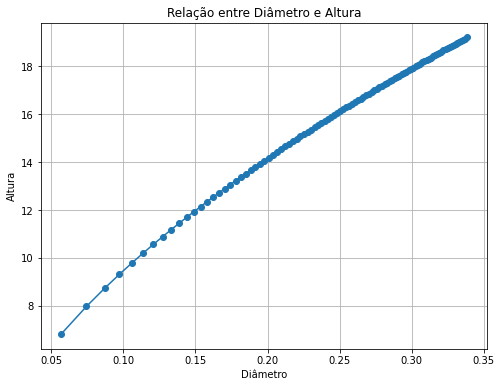

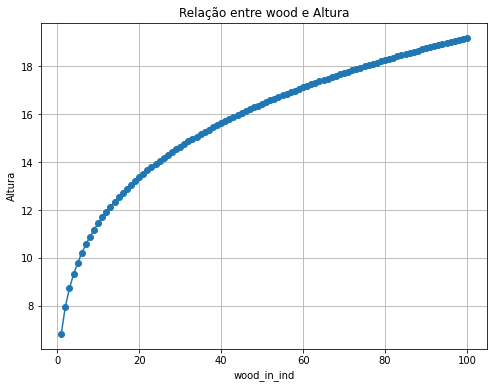

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 * 1e6
k_allom2 = 36.
k_allom3 = 0.58
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1, 100, 100)

# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind')
plt.ylabel('Diâmetro')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

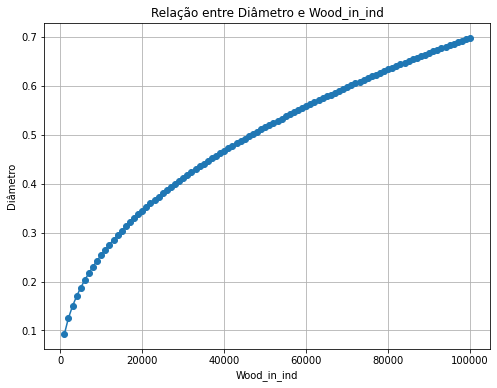

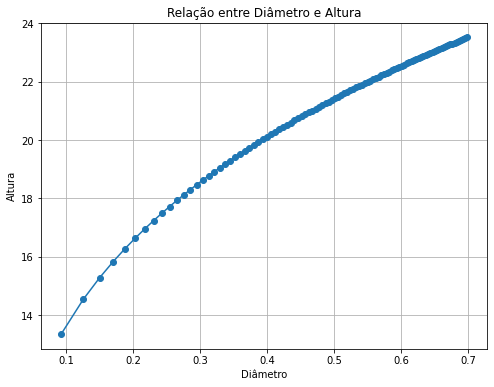

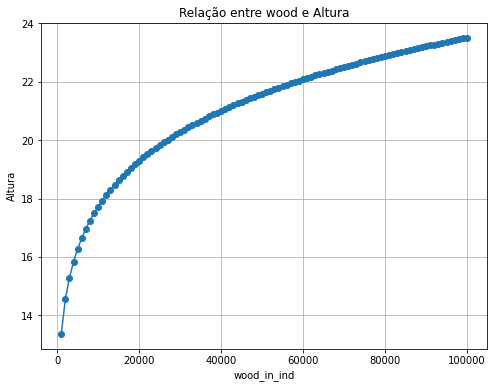

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 * 1e6
k_allom2 = 26.
k_allom3 = 0.28
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1*1000, 100*1000, 100)

# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind/100)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind')
plt.ylabel('Diâmetro')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

Using mean value for wood density, gC e valores originais para constantes allométricas


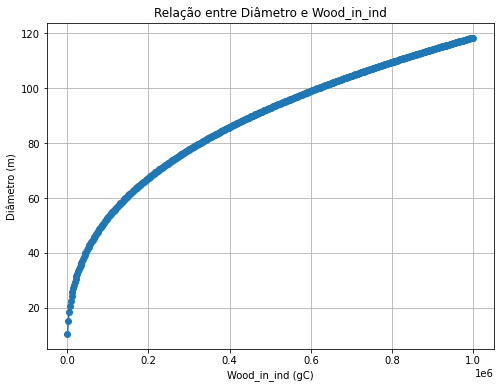

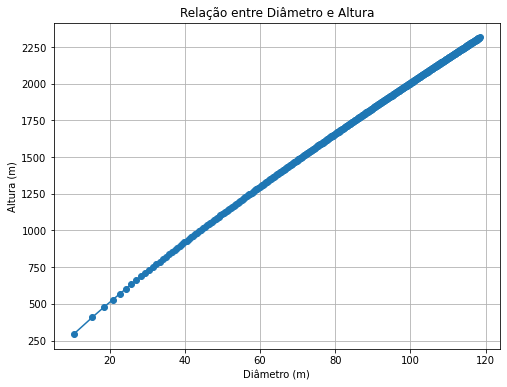

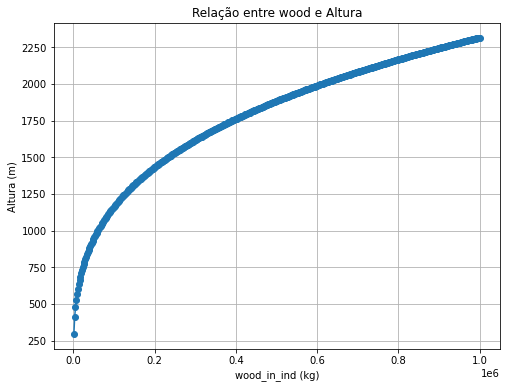

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74*1e6 #0.619 *1000 #gcm-3 - *1000 transforms to m3
k_allom2 = 40.
k_allom3 = 0.85
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1000, 1000000, 500) #g



# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
  
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (gC)')
plt.ylabel('Diâmetro (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (kg)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

Using mean value for wood density, kgC e valores originais para constantes allométricas

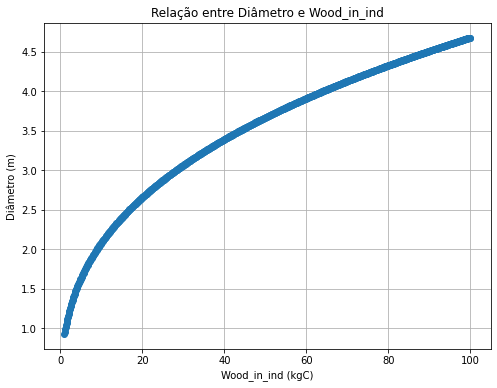

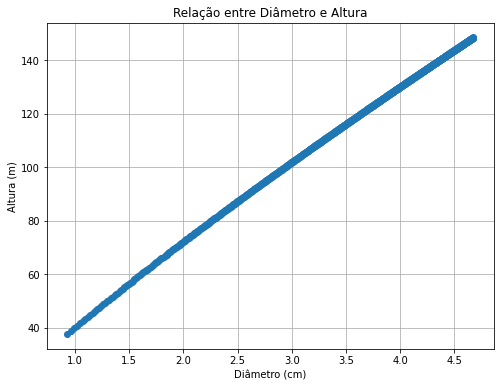

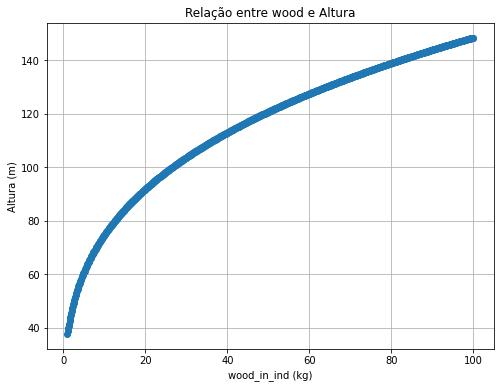

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.619 *1000 #gcm-3 - *1000 transforms to m3
k_allom2 = 40.
k_allom3 = 0.85
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1, 100, 1000) #kg
wood_in_ind_value = wood_in_ind_values #g


# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
# wood_in_ind_values = wood_in_ind_values/1000   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (kgC)')
plt.ylabel('Diâmetro (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (kg)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

Using mean value for wood density, kgC e  constantes allométricas baseadas em Seiler et al 2014

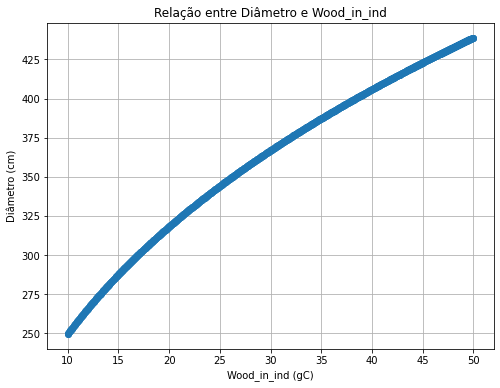

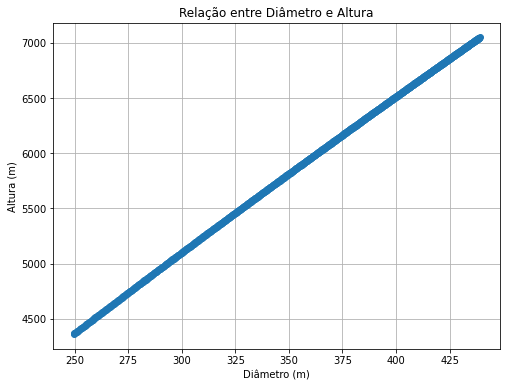

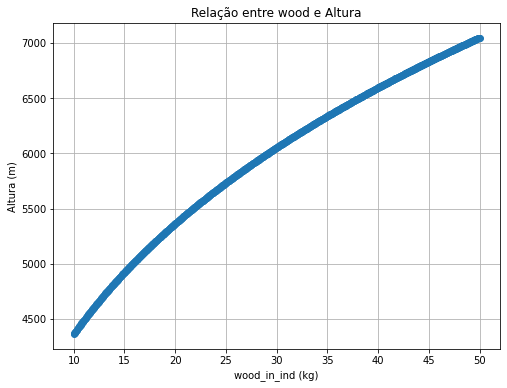

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 #gm3 
k_allom2 = 40.
k_allom3 = 0.85
klatosa = 8000.
sla_allom = 0.023
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(10, 50, 1000) #kg
#wood_in_ind_value = wood_in_ind_values #g


# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    sap_in_ind = wood_in_ind*0.2
    diameter = ((4*(wood_in_ind*1000)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    
    height = k_allom2 * ((diameter) ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    
# wood_in_ind_values = wood_in_ind_values/1000   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (gC)')
plt.ylabel('Diâmetro (cm)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (kg)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

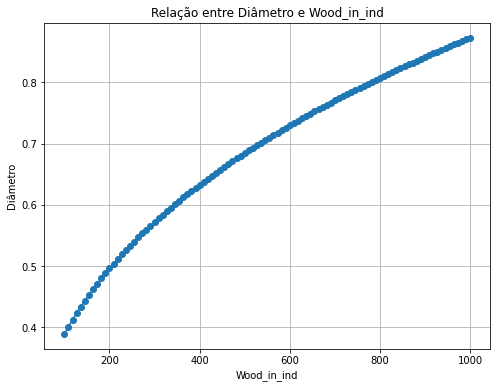

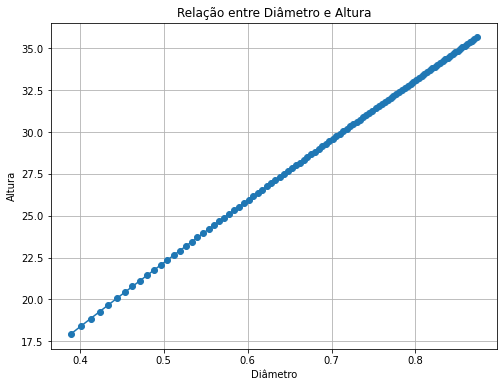

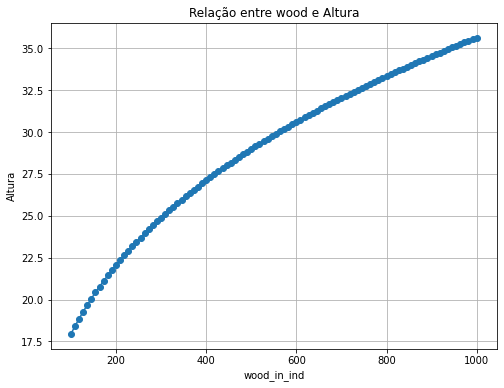

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 * 1e6
k_allom2 = 40.
k_allom3 = 0.85
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(100, 1000, 100)

# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind')
plt.ylabel('Diâmetro')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

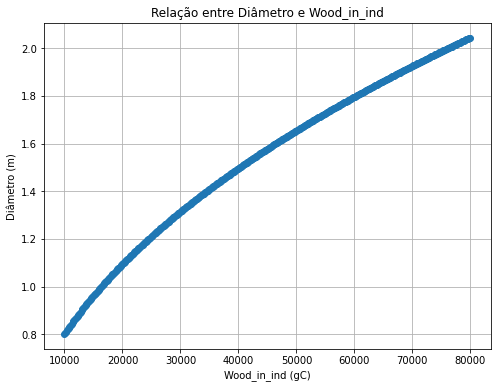

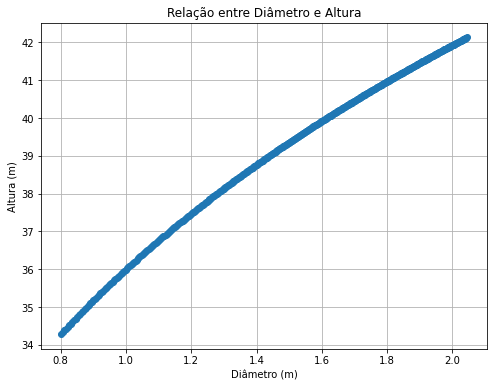

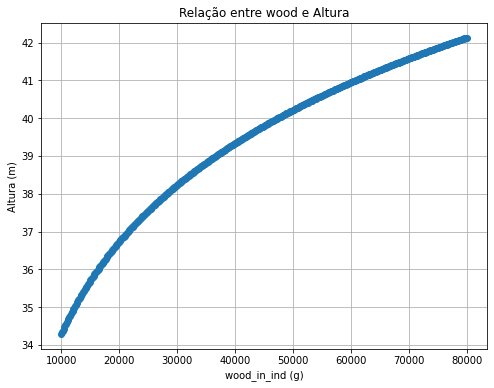

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74*1e6 #600.#0.5*1e6 #0.74*1000 #0.619 *1000 #gcm-3 - *1000 transforms to m3
k_allom2 = 36.
k_allom3 = 0.22
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(10000., 80000., 500) #g



# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind/10.)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
  
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (gC)')
plt.ylabel('Diâmetro (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (g)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

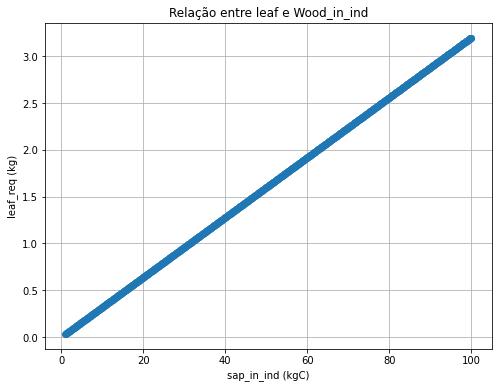

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 500 #kg/m3
k_allom2 = 36.
k_allom3 = 0.22
klatosa = 8000.
height = 25.
sla_allom = 20.
pi = math.pi

# Faixa de valores para wood_in_ind
sap_in_ind_values = np.linspace(1., 100., 1000) #kg



# Lista para armazenar os valores de diameter
leaf_req_values = []


# Calcula os diâmetros para cada valor de wood_in_ind
for sap_in_ind in sap_in_ind_values:
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    leaf_req_values.append(leaf_req)
    
  
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(sap_in_ind_values,leaf_req_values,  marker='o')
plt.title('Relação entre leaf e Wood_in_ind')
plt.xlabel('sap_in_ind (kgC)')
plt.ylabel('leaf_req (kg)')
plt.grid(True)
plt.show()




1.2324071885401495
23.639232600443897
0.8057630029521928


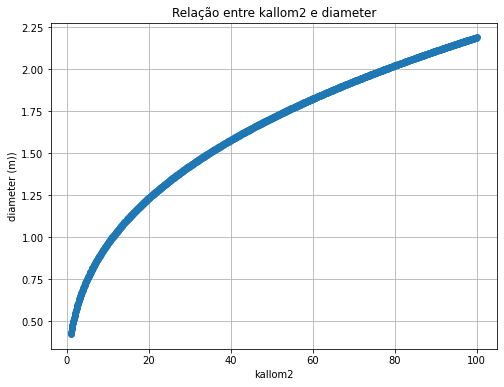

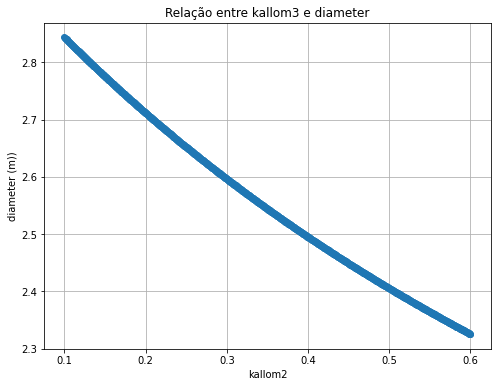

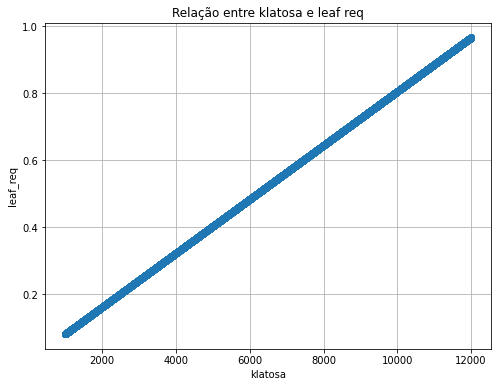

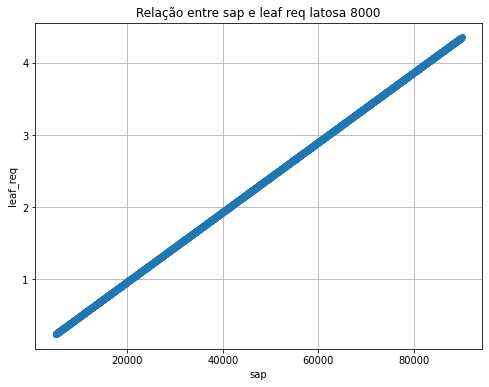

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.7*1e6
k_allom2 = 20.
k_allom3 = 0.8
klatosa = 10000.
# height = 25.
sla_allom = 15.
pi = math.pi
sap_in_ind = 20000

diameter = ((sap_in_ind)/(dwood)*pi*k_allom2)**(1/(2+k_allom3))
print(diameter)
height = k_allom2*(diameter**k_allom3)
print(height)
leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
print(leaf_req)

# Faixa de valores para wood_in_ind
k_allom2_values = np.linspace(1., 100., 1000) #kg

k_allom3_values = np.linspace(0.1, .6, 1000) #kg

klatosa_values = np.linspace(1000,12000, 20000)

sap_in_ind_values = np.linspace(5000, 90000, 2000)
# Lista para armazenar os valores de diameter
diameter_values = []


# Calcula os diâmetros para cada valor de wood_in_ind
for k_allom2 in k_allom2_values:
    diameter = ((sap_in_ind)/(dwood)*pi*k_allom2)**(1/(2+k_allom3))
    diameter_values.append(diameter)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(k_allom2_values,diameter_values,  marker='o')
plt.title('Relação entre kallom2 e diameter')
plt.xlabel('kallom2')
plt.ylabel('diameter (m))')
plt.grid(True)
plt.show()

diameter_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for k_allom3 in k_allom3_values:
    diameter = ((sap_in_ind)/(dwood)*pi*k_allom2)**(1/(2+k_allom3))
    diameter_values.append(diameter)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(k_allom3_values,diameter_values,  marker='o')
plt.title('Relação entre kallom3 e diameter')
plt.xlabel('kallom2')
plt.ylabel('diameter (m))')
plt.grid(True)
plt.show()

leaf_req_values = []

for klatosa in klatosa_values:
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    leaf_req_values.append(leaf_req)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(klatosa_values, leaf_req_values, marker='o')
plt.title('Relação entre klatosa e leaf req')
plt.xlabel('klatosa')
plt.ylabel('leaf_req')
plt.grid(True)
plt.show()

leaf_req_values = []

for sap_in_ind in sap_in_ind_values:
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    leaf_req_values.append(leaf_req)


# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(sap_in_ind_values, leaf_req_values, marker='o')
plt.title('Relação entre sap e leaf req latosa 8000')
plt.xlabel('sap')
plt.ylabel('leaf_req')
plt.grid(True)
plt.show()